# Signal Subgraph Estimators

### This tutorial will introduce the following signal-subgraph estimators:
- Incoherent subgraph estimator
- Coherent subgraph estimator

In [1]:
import graspologic.subgraph as sg
import matplotlib.pyplot as plt
import numpy as np

#### Preliminaries

The general graph model is characterized by $M_V(m,s;\pi,p,q)$, where: 

$V$ - the number of vertices in the graph

$n$ - the number of graph samples

$s$ - the number of edges that must be present in the subgraph

$m$ - the number of vertices that each edge in the subgraph must be incident to

$\pi$ - the probability of a graph sample being of class 1

$p$ - the probability of edges in the signal-subgraph, conditioned on Class 0

$q$ - the probability of edges in the signal-subgraph, conditioned on Class 1

The signal-subgraph is a subset of edges with distinct class-conditional likelihood parameters. The signal-subgraph estimator evaluates a test statistic for each edge in the graph and selects $s$ edges with the lowest test statistic, where $s$ is the desired size of the signal-subgraph. 

The estimator that is used to find the signal-subgraph determines certain properties of the resulting subgraph. Both estimators use $s$ to determine the size of the resulting subgraph. $m$ is only used for the coherent estimator, which constrains the subgraph to $m$ vertices. 

## Incoherent Signal-Subgraph Estimator

For this example we will randomly select 20 edges from a graph with 70 vertices. These edges will have distinct class-conditional edge probabilities, and the graphs will be sampled from the model $M_{70}(20; 0.5, 0.8, 0.1)$, with $n = 100$.

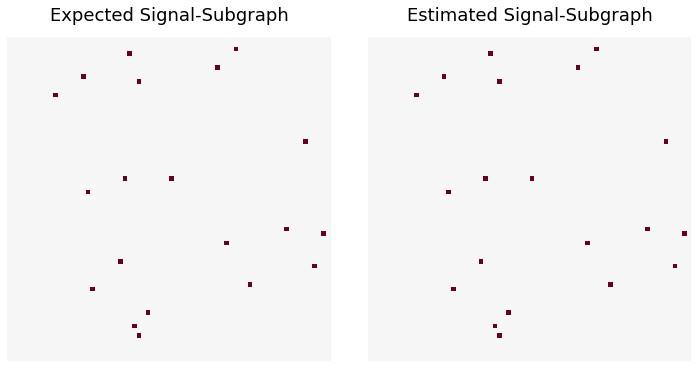

In [2]:
from graspologic.plot import heatmap

verts = 70
sedges = 20
pi = 0.5
p = 0.8
q = 0.1
nsamples = 100

np.random.seed(8888)
classlabels = np.zeros(nsamples, dtype=int)
classlabels[1::2] = 1

sigsubindex = np.random.choice(verts ** 2, sedges, replace=False)
vect = p * np.ones(verts ** 2)
vect[sigsubindex] = q
vect = np.reshape(vect, (verts, verts))
expected = np.where(vect == q, 1, 0)

blank = vect[:, :, None] + np.zeros(int(nsamples / 2))
A = p * np.ones((verts, verts, nsamples))
A[:, :, 1::2] = blank
A = np.random.binomial(1, A)

sigsub = sg.SignalSubgraph()
sigsub.fit_transform(graphs=A, labels=classlabels, constraints=sedges)

estimatesigsub = np.zeros((verts, verts))
estimatesigsub[sigsub.sigsub_] = 1

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True)
heatmap(expected, ax=ax[0], cbar=False, title="Expected Signal-Subgraph")
_ = heatmap(estimatesigsub, ax=ax[1], cbar=False, title="Estimated Signal-Subgraph")

Note that because $p$ and $q$ are sufficiently distinct and $n$ is sufficiently large, the Expected and Estimated signal-subgraphs should match exactly. 

## Incoherent Signal-Subgraph Estimator

Once again, we will randomly select 20 edges from a graph with 70 vertices. These edges will have distinct class-conditional edge probabilities, but the graphs will be sampled from the model $M_{70}(1, 20; 0.5, 0.8, 0.1)$, with $n = 100$.

The estimated signal-subgraph will have 20 edges, constrained so that each edge must be incident to the same vertex. First, we will use the same expected signal-subgraph as the previous example.

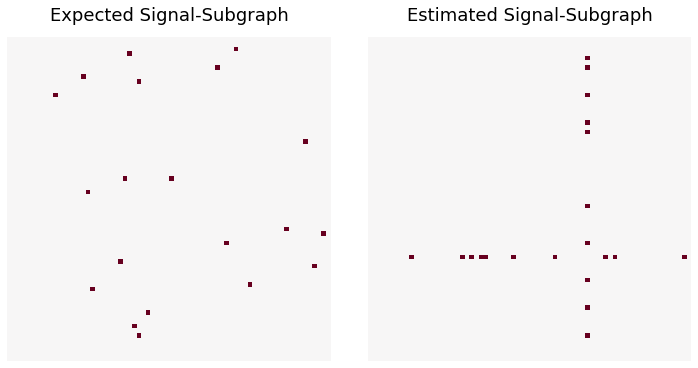

In [3]:
np.random.seed(8888)
classlabels = np.zeros(nsamples, dtype=int)
classlabels[1::2] = 1

sigsubindex = np.random.choice(verts ** 2, sedges, replace=False)
vect = p * np.ones(verts ** 2)
vect[sigsubindex] = q
vect = np.reshape(vect, (verts, verts))
expected = np.where(vect == q, 1, 0)

blank = vect[:, :, None] + np.zeros(int(nsamples / 2))
A = p * np.ones((verts, verts, nsamples))
A[:, :, 1::2] = blank
A = np.random.binomial(1, A)

sigsub = sg.SignalSubgraph()
sigsub.fit_transform(A, classlabels, [20, 1])

estimatesigsub = np.zeros((verts, verts))
estimatesigsub[sigsub.sigsub_] = 1

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True)
heatmap(expected, ax=ax[0], cbar=False, title="Expected Signal-Subgraph")
_ = heatmap(estimatesigsub, ax=ax[1], cbar=False, title="Estimated Signal-Subgraph")

Notice how the coherent estimator constrains the estimated signal-subgraph to 20 edges that are incident to 1 vertex with the best total significance values. Now, we will try an expected signal-subgraph that is also limited to one vertex.

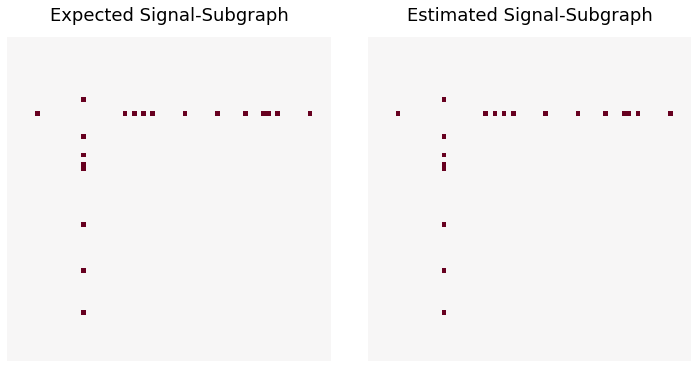

In [4]:
mverts = 1

np.random.seed(7777)
classlabels = np.zeros(nsamples, dtype=int)
classlabels[1::2] = 1

m = np.random.choice(verts, mverts)
vect = p * np.ones(2 * verts * mverts - (mverts ** 2))
vect[np.random.choice(len(vect), sedges, replace=False)] = q

blank = p * np.ones((verts, verts))
blank[m, :] = np.nan
blank[:, m] = np.nan
blank[np.isnan(blank)] = vect
expected = np.where(blank == q, 1, 0)

blank = blank[:, :, None] + np.zeros(int(nsamples / 2))
A = p * np.ones((verts, verts, nsamples))
A[:, :, 1::2] = blank
A = np.random.binomial(1, A)

sigsub = sg.SignalSubgraph()
sigsub.fit_transform(graphs=A, labels=classlabels, constraints=sedges)

estimatesigsub = np.zeros((verts, verts))
estimatesigsub[sigsub.sigsub_] = 1

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True)
heatmap(expected, ax=ax[0], cbar=False, title="Expected Signal-Subgraph")
_ = heatmap(estimatesigsub, ax=ax[1], cbar=False, title="Estimated Signal-Subgraph")

Now that the expected signal-subgraph is constrained to the coherent signal-subgraph model, the Expected and Estimated signal-subgraphs are exactly equal. 